## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

[Double-click to enter your responses here.]

### Import packages

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
print(df.columns.tolist())


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [6]:
# Rename columns as needed
df = df.rename(columns = {'satisfaction_level': 'sat_lvl',
                                   'number_project':'no._of_project',
                                   'average_montly_hours':'avg_monthly_hours',
                                  'promotion_last_5years':'prom_last_5yrs',
                         'time_spend_company':'tenure'})


# Display all column names after the update
print(df.columns.tolist())


['sat_lvl', 'last_evaluation', 'no._of_project', 'avg_monthly_hours', 'tenure', 'Work_accident', 'left', 'prom_last_5yrs', 'Department', 'salary']


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
pd.isnull(df)


,sat_lvl,last_evaluation,no._of_project,avg_monthly_hours,tenure,Work_accident,left,prom_last_5yrs,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated().any()


True

In [9]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()]


,sat_lvl,last_evaluation,no._of_project,avg_monthly_hours,tenure,Work_accident,left,prom_last_5yrs,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_new = df.drop_duplicates()


# Display first few rows of new dataframe as needed
df_new.head()




,sat_lvl,last_evaluation,no._of_project,avg_monthly_hours,tenure,Work_accident,left,prom_last_5yrs,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

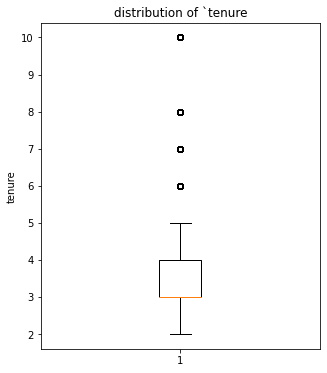

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
plt.boxplot(df['tenure'].dropna())
plt.title('distribution of `tenure')
plt.ylabel('tenure')
plt.show()



In [12]:
# Determine the number of rows containing outliers
q1 = df['tenure'].quantile(0.25)
q3= df['tenure'].quantile(0.75)
IQR = q3 -q1

lower_bound = q1 - 1.5 *IQR
upper_bound = q3 + 1.5*IQR

outliers = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)]

num_outliers = outliers.shape[0]

print("Number of rows containing outliers:", num_outliers)



Number of rows containing outliers: 1282


In [13]:
# we wil be using logistic regression, so outliers can be harmful therefore we will remove them

df['tenure'] = np.clip(df['tenure'], lower_bound, upper_bound)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
df['left'].value_counts()

# Get percentages of people who left vs. stayed
df['left'].value_counts(normalize = True)*100


0    76.191746
1    23.808254
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
import matplotlib
print(matplotlib.__version__)

3.5.3


In [16]:
#update matplotlib
!pip install --upgrade matplotlib

In [17]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


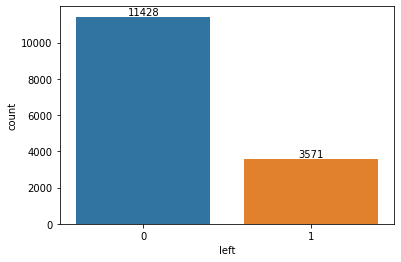

In [18]:
# Create a plot as needed
#countplot of left 

import seaborn as sns
ax =sns.countplot( x= 'left',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


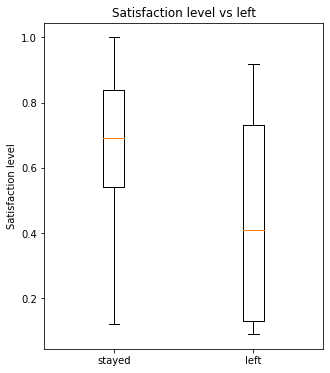

In [19]:
# Create a plot as needed
# boxplot of sa_lvl VS left

plt.figure(figsize=(5,6))
data = [df[df['left'] ==0]['sat_lvl'], df[df['left']==1]['sat_lvl']]
plt.boxplot(data,labels = ['stayed','left'])
plt.title('Satisfaction level vs left')
plt.ylabel('Satisfaction level')
plt.show()


**Employees who left the company have substantially lower satisfaction levels compared to those who stayed.
The median satisfaction of employees who left is around 0.4, whereas the median satisfaction of employees who stayed is around 0.7–0.8.
This suggests that low satisfaction is a key driver of employee turnover.**

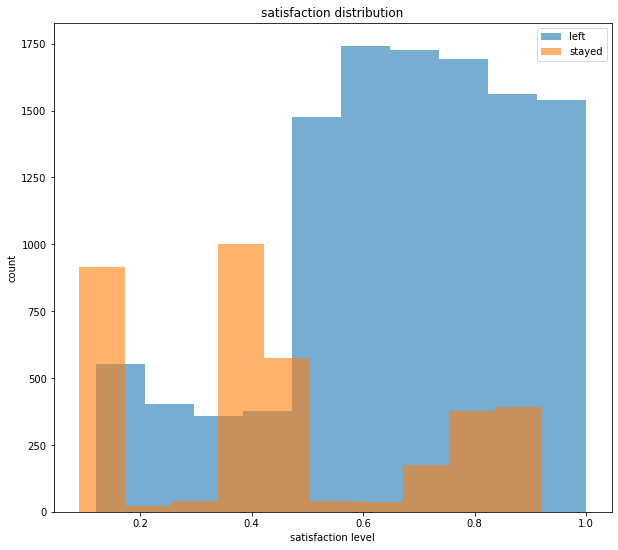

In [20]:
# Create a plot as needed
plt.figure(figsize = (10,9))
plt.hist(df[df['left']==0]['sat_lvl'], alpha =0.6, label = 'left')
plt.hist(df[df['left']==1]['sat_lvl'], alpha =0.6, label = 'stayed')
plt.title('satisfaction distribution')
plt.xlabel('satisfaction level')
plt.ylabel('count')
plt.legend()
plt.show()

**“Most employees who left have satisfaction between 0.1 to 0.4” And 
“Most employees who stayed have satisfaction between 0.6 to 0.9”

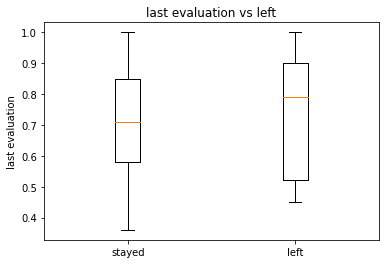

In [21]:
# Create a plot as needed
#Box plot of last evaluation vs left

data =[df[df['left']==0]['last_evaluation'],df[df['left']==1]['last_evaluation']]
plt.boxplot(data,labels = ['stayed','left'])
plt.title('last evaluation vs left')
plt.ylabel('last evaluation')
plt.show()
        

**The distribution of last evaluation scores is similar for employees who stayed and those who left. This indicates that performance rating does not significantly influence turnover. Employees across all evaluation levels tend to leave, meaning turnover is not limited to low performers.**

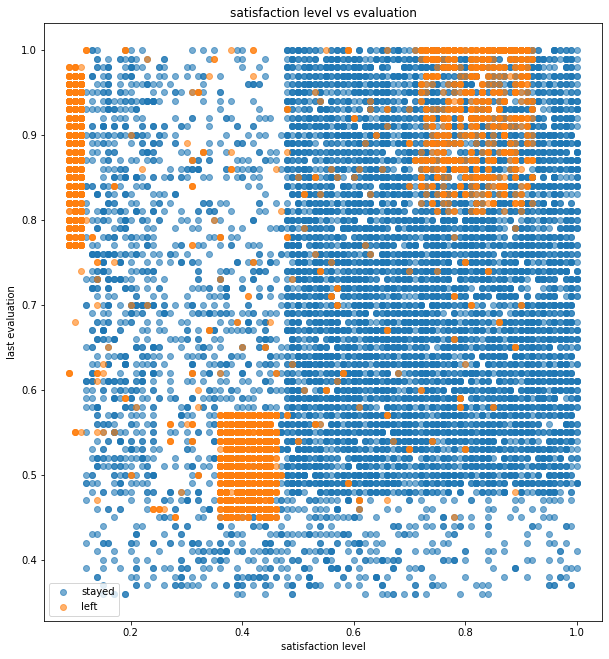

In [22]:
# Create a plot as needed
# Scatter plot of satisfaction vs evaluation
# Scatter plot of satisfaction vs evaluation
plt.figure(figsize =(10,11))
plt.scatter(
    df[df['left']==0]['sat_lvl'],
    df[df['left']==0]['last_evaluation'],
    label='stayed',
    alpha=0.6
)

plt.scatter(
    df[df['left']==1]['sat_lvl'],
    df[df['left']==1]['last_evaluation'],
    label='left',
    alpha=0.6
)

plt.title('satisfaction level vs evaluation')
plt.xlabel('satisfaction level')
plt.ylabel('last evaluation')
plt.legend()
plt.show()





**The scatterplot of satisfaction vs. evaluation shows that turnover is not strongly tied to evaluation score, as employees who stayed and left exist across the full evaluation range.
However, employees who left tend to cluster at lower satisfaction levels. Additionally, a smaller cluster of high-performing, high-satisfaction employees also left, suggesting possible burnout or lack of reward for top performers. Overall, satisfaction level is a clearer differentiator of turnover compared to evaluation score.**

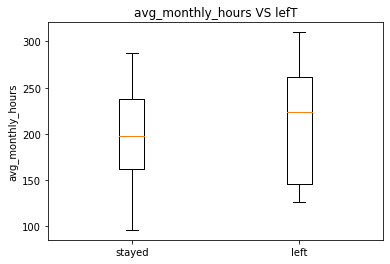

In [23]:
# Create a plot as needed
#box plot of avg_monthly_hours VS left

data =[df[df['left']==0]['avg_monthly_hours'],df[df['left']==1]['avg_monthly_hours']]
plt.boxplot(data,labels = ['stayed','left'])
plt.title('avg_monthly_hours VS lefT')
plt.ylabel('avg_monthly_hours')
plt.show()


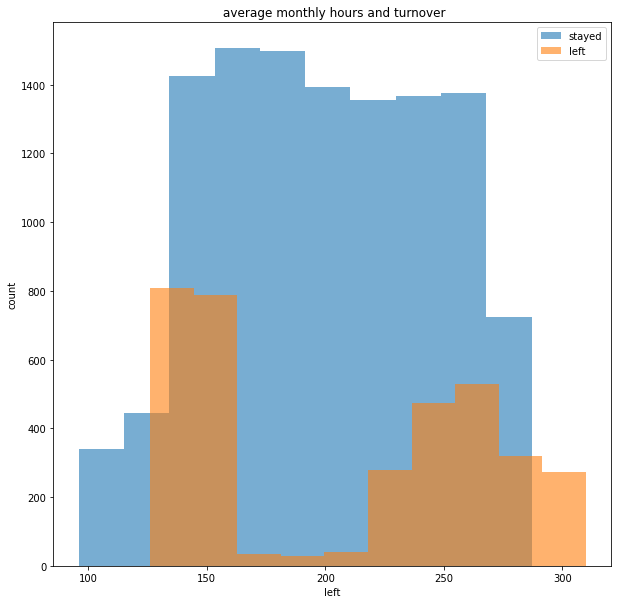

In [24]:
# Create a plot as needed
# Histogram for average monthly hours and turnover/left
plt.figure(figsize = (10,10))
plt.hist(df[df['left']==0]['avg_monthly_hours'],alpha =0.6, label = 'stayed')
plt.hist(df[df['left']==1]['avg_monthly_hours'],alpha =0.6, label = 'left')
plt.title(' average monthly hours and turnover')
plt.xlabel('left')
plt.ylabel('count')
plt.legend()
plt.show()


**The distribution of average monthly working hours shows a U-shaped turnover pattern.
Employees who left the company tend to fall into two groups:
(1) those working very low hours (130–160 hours) and
(2) those working very high hours (230–310 hours).
In contrast, employees who stayed typically work between 160 and 230 hours per month.
This suggests that both underutilization and excessive workload contribute to employee turnover, while moderate, balanced hours are associated with retention.**

In [25]:
print(df.columns)

Index(['sat_lvl', 'last_evaluation', 'no._of_project', 'avg_monthly_hours',
       'tenure', 'Work_accident', 'left', 'prom_last_5yrs', 'Department',
       'salary'],
      dtype='object')


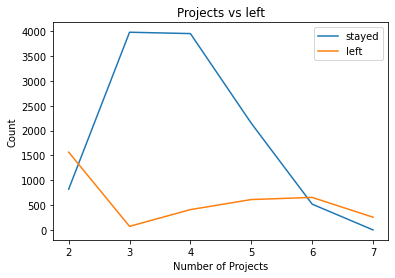

In [26]:
# Create a plot as needed
### Projects vs left
projects = sorted(df['no._of_project'].unique())
stayed = [len(df[(df['no._of_project']==p) & (df['left']==0)]) for p in projects]
left = [len(df[(df['no._of_project']==p) & (df['left']==1)]) for p in projects]
plt.plot(projects, stayed,label='stayed')
plt.plot(projects, left, label= 'left')
plt.title('Projects vs left')
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend()
plt.show()

**The number of projects assigned to employees shows a strong relationship with turnover. Employees working on 3–4 projects have the highest retention rates. Turnover increases among employees with very few projects (2), suggesting disengagement, and among employees with many projects (6–7), suggesting burnout. This indicates that balanced workload distribution plays a key role in employee retention.**

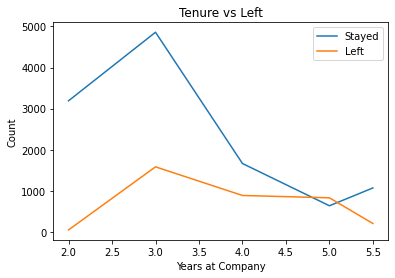

In [27]:
#Countplot-style chart: tenure vs left
years = sorted(df['tenure'].unique())

stayed = [len(df[(df['tenure'] == y) & (df['left'] == 0)]) for y in years]
left   = [len(df[(df['tenure'] == y) & (df['left'] == 1)]) for y in years]

plt.plot(years, stayed, label='Stayed')
plt.plot(years, left, label='Left')

plt.title('Tenure vs Left')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.legend()
plt.show()


**Employee tenure shows a clear relationship with turnover. Turnover peaks around the third year of employment, indicating a critical retention period. Employees who remain beyond four years are significantly less likely to leave, suggesting increased stability and loyalty with longer tenure.**

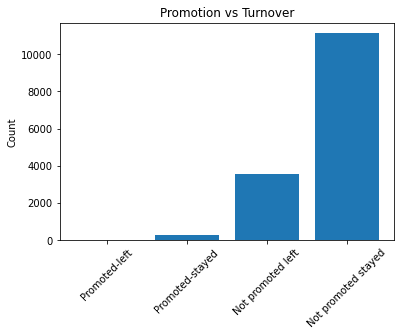

In [28]:
#Promotion vs left
promotion_left = len(df[(df['prom_last_5yrs'] == 1) & (df['left']==1)])
promotion_stayed = len(df[(df['prom_last_5yrs'] == 1) & (df['left']==0)])
not_prom_left = len(df[(df['prom_last_5yrs'] == 0) & (df['left']==1)])
not_prom_stayed = len(df[(df['prom_last_5yrs'] == 0) & (df['left']==0)])
plt.bar(['Promoted-left','Promoted-stayed','Not promoted left','Not promoted stayed'],
        [promotion_left,promotion_stayed,not_prom_left,not_prom_stayed])
plt.title("Promotion vs Turnover")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**The majority of employee turnover occurs among employees who were not promoted in the last five years. Very few employees who received promotions left the company, indicating that promotion plays a significant role in employee retention.**

### Insights

**Employee turnover is driven primarily by job satisfaction, workload balance, project allocation, tenure stage, and promotion opportunities, rather than by performance evaluation alone.
Employees are most likely to stay when they experience high satisfaction, balanced workload, optimal project assignment, career growth, and long-term engagement.**

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task of model is to predict whether the employee will leave or not. what is the probability that he/she will leave or not based on the other variables.

### Identify the types of models most appropriate for this task.

For this task most appropriate model will be the Logistic Regression model.

### Modeling

In [38]:
#Logistic Regression Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df[['sat_lvl', 'last_evaluation', 'no._of_project', 'avg_monthly_hours',
       'tenure', 'Work_accident','prom_last_5yrs']]
y = df['left']

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

#preprocessing - standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7473333333333333
[[2074  220]
 [ 538  168]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      2294
           1       0.43      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.61      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**The logistic regression model achieved an overall accuracy of 74.7%.
While the model performs well in predicting employees who stay (recall = 0.90), it struggles to correctly identify employees who leave the company (recall = 0.24).
This indicates that although the model is effective as a baseline, it is limited in its ability to detect high-risk employees, which is critical for employee retention use cases.**

### Conclusion, Recommendations, Next Steps

**This project aimed to understand the key drivers of employee turnover and to build a predictive model that can help identify employees at risk of leaving the organization.
Exploratory data analysis revealed that employee turnover is strongly influenced by job satisfaction, workload balance, number of projects, tenure, and promotion opportunities. Employees with low satisfaction, extreme working hours, very low or very high project loads, lack of promotion, and around three years of tenure were more likely to leave the company. In contrast, performance evaluation scores alone did not show a strong relationship with turnover.
A logistic regression model was developed as a baseline predictive approach. The model achieved an overall accuracy of 74.7%, performing well in predicting employees who stayed. However, it showed limited ability to correctly identify employees who left, with a recall of 24% for leavers. This highlights the challenge of predicting employee attrition in an imbalanced dataset and confirms that more advanced modeling techniques are required.
Overall, the analysis demonstrates that employee turnover is a multi-factor problem that cannot be explained by performance alone and requires both data-driven and organizational interventions.**

### Recommendation
**Based on the insights obtained from data visualization and modeling, the following recommendations are proposed:**

**1.Improve Employee Satisfaction
Regularly monitor employee satisfaction levels.Address concerns related to work environment, role clarity, and recognition.**

**2.Balance Workload and Project Allocation
Avoid assigning too few or too many projects to employees.Aim to maintain an optimal workload to prevent burnout and disengagement.**

**3.Focus on the Critical 2–3 Year Tenure Window
Implement retention strategies such as mentoring, career discussions, and skill development programs for employees approaching 3 years of tenure.**

**4.Strengthen Promotion and Career Growth Policies
Employees who received promotions showed significantly lower turnover.Transparent and timely promotion opportunities can greatly improve retention.**

**5.Use Predictive Models for Early Intervention
Even with its limitations, the current model can help flag employees who may need additional attention. HR teams can use predictions as a support tool, not as a final decision-maker.**

## Next steps
**To further improve the effectiveness of this analysis and model, the following steps are recommended:**

**1.Improve Model Performance
Retrain logistic regression using class_weight='balanced'. Optimize evaluation metrics such as recall and F1-score for employees who leave.**

**2.Apply Advanced Machine Learning Models
Implement decision trees, random forests, or gradient boosting models to capture non-linear relationships. Compare model performance using ROC-AUC and confusion matrices.**

**3.Feature Engineering
Create new features such as workload intensity or satisfaction-tenure interaction.Encode categorical variables more effectively.**

**4.Address Data Imbalance
Use techniques such as resampling or cost-sensitive learning to improve detection of leavers.**

**5.Business Integration
Deploy the model as an HR decision-support tool. Continuously retrain the model with new employee data to maintain accuracy.**

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.